# Temperature prediction using ML

## Import required library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset CSV file

In [2]:
dataset_path = 'data/temp_data.csv'
df = pd.read_csv(dataset_path)

### Check the loaded dataset

In [3]:
print(f'Data Head \n {df.head()} \n Data Tail \n {df.tail()}')

Data Head 
    Unnamed: 0             Datetime  Hourly_Temp
0           0  2022-01-04 00:00:00       20.867
1           1  2022-01-04 01:00:00       21.000
2           2  2022-01-04 02:00:00       20.867
3           3  2022-01-04 03:00:00       20.650
4           4  2022-01-04 04:00:00       20.400 
 Data Tail 
       Unnamed: 0             Datetime  Hourly_Temp
7051        7051  2022-10-24 19:00:00       25.567
7052        7052  2022-10-24 20:00:00       25.183
7053        7053  2022-10-24 21:00:00       24.600
7054        7054  2022-10-24 22:00:00       23.986
7055        7055  2022-10-24 23:00:00       23.383


### Remove the column "Unnamed: 0"

In [4]:
df = df.drop(['Unnamed: 0'],axis=1)
print(df.head())

              Datetime  Hourly_Temp
0  2022-01-04 00:00:00       20.867
1  2022-01-04 01:00:00       21.000
2  2022-01-04 02:00:00       20.867
3  2022-01-04 03:00:00       20.650
4  2022-01-04 04:00:00       20.400


### Set "Datetime" column as index

In [5]:
# convert the column value from String into datetime 
df['Datetime'] = pd.to_datetime(df['Datetime'])

# set the column as index
df = df.set_index('Datetime')

print(df.head())

                     Hourly_Temp
Datetime                        
2022-01-04 00:00:00       20.867
2022-01-04 01:00:00       21.000
2022-01-04 02:00:00       20.867
2022-01-04 03:00:00       20.650
2022-01-04 04:00:00       20.400


## Data Analysis

### Data information and description

In [6]:
print(f'Data information \n {df.info()} \n Data description \n {df.describe()}')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2022-01-04 00:00:00 to 2022-10-24 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hourly_Temp  7056 non-null   float64
dtypes: float64(1)
memory usage: 110.2 KB
Data information 
 None 
 Data description 
        Hourly_Temp
count  7056.000000
mean     21.867468
std       6.737313
min       5.350000
25%      18.400000
50%      24.033000
75%      26.333000
max      36.500000


### Plot the original data

<Axes: xlabel='Datetime', ylabel='Hourly_Temp'>

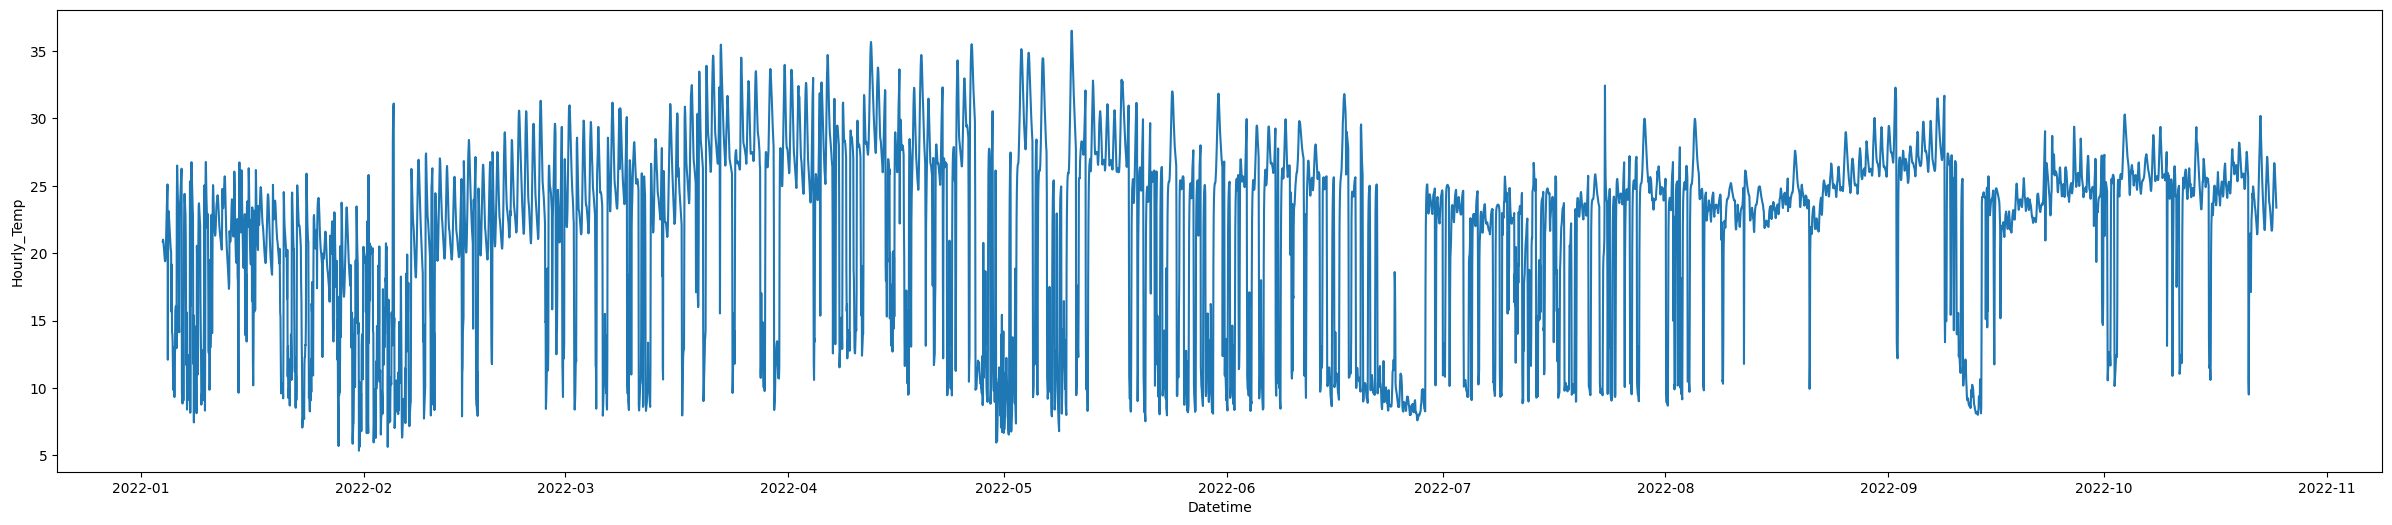

In [7]:
plt.figure(figsize=(30,6))
# sns.lineplot(data=df['Hourly_Temp'].resample('D').mean())
sns.lineplot(data=df['Hourly_Temp'])

### Give null to the data

In [8]:
how_many_points = 1000
for i in range(0,how_many_points):
    nan_idx = np.random.randint(1,len(df))
    df['Hourly_Temp'].iloc[nan_idx] = np.nan

/tmp/ipykernel_325041/3309572127.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Hourly_Temp'].iloc[nan_idx] = np.nan


### Check null data

In [9]:
df[df['Hourly_Temp'].isnull()]

,Hourly_Temp
Datetime,
2022-01-04 07:00:00,NaN
2022-01-05 23:00:00,NaN
2022-01-06 04:00:00,NaN
2022-01-06 09:00:00,NaN
2022-01-06 11:00:00,NaN
...,...
2022-10-23 22:00:00,NaN
2022-10-24 02:00:00,NaN
2022-10-24 05:00:00,NaN


### Recover null

<Axes: xlabel='Datetime', ylabel='Hourly_Temp'>

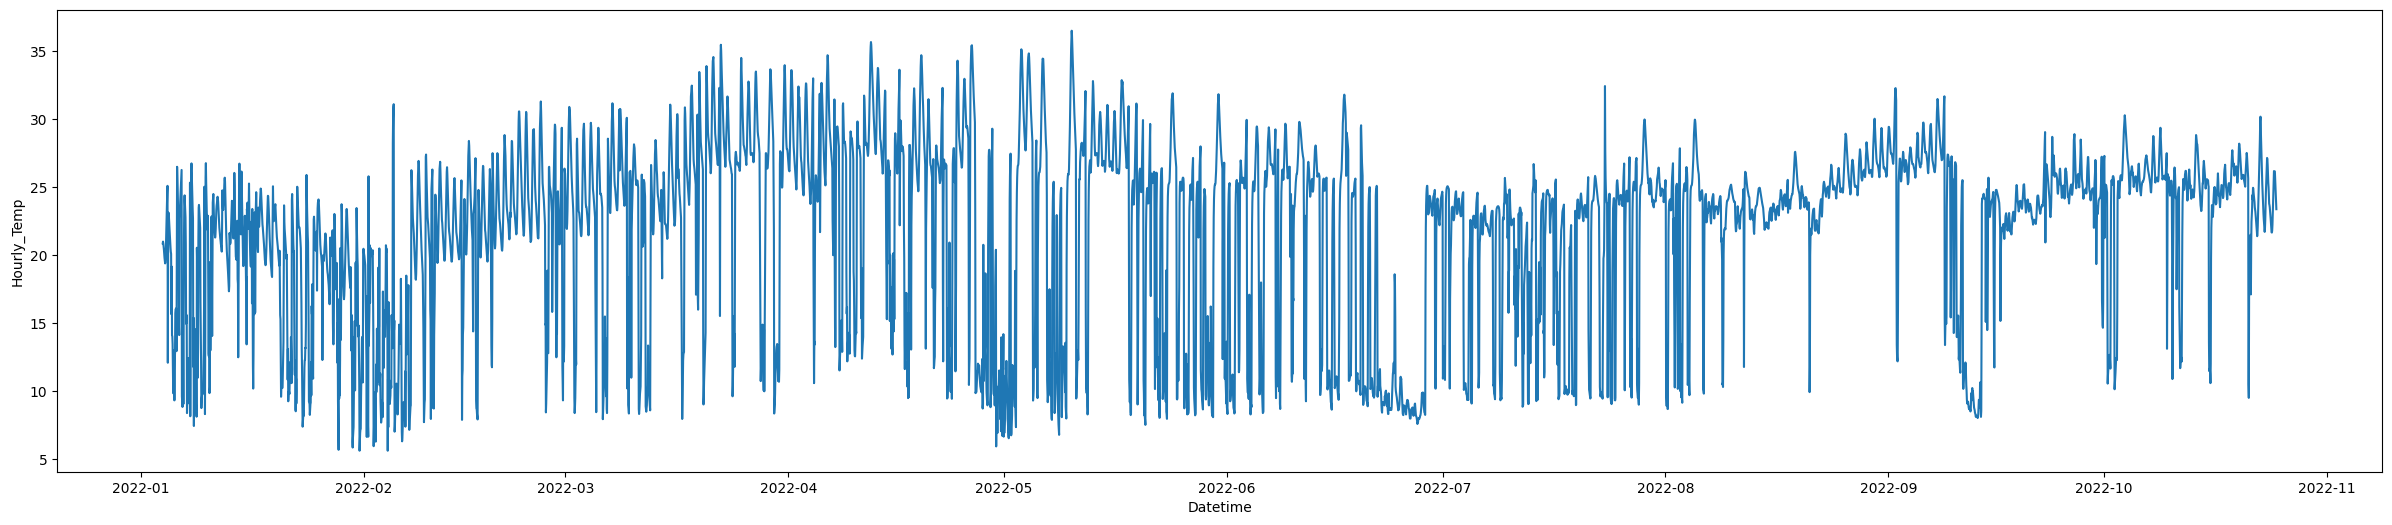

In [10]:
plt.figure(figsize=(30,6))
sns.lineplot(data=df['Hourly_Temp'])
# sns.lineplot(data=df['Hourly_Temp'].resample('D').mean())

## Imputing the null

#### Method 1: simple imputer

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [13]:
imputer.fit(df)

SimpleImputer()

In [14]:
df[:] = imputer.transform(df)

In [18]:
df.isna().any()

Hourly_Temp    False
dtype: bool

In [20]:
df.describe()

,Hourly_Temp
count,7056.000000
mean,21.836389
std,6.276247
min,5.633000
25%,20.300000
50%,23.200000
75%,25.900000
max,36.500000


### Split the dataset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_size = 0.9
test_size = 0.1

### Normalize the data

In [21]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler()